In [20]:
import tensorflow as tf
import numpy as np

In [6]:
model=tf.keras.models.load_model('yolov4.h5')

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 416, 416, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 416, 416, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 416, 416, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

In [13]:
import cv2

In [18]:
img=cv2.imread('cars.jpg')
img=cv2.resize(img,(416,416))
img=numpy.divide(img,255)

In [31]:
res=model(np.array([img]))

In [54]:
conf=np.array(res)[:,:,4:]

In [58]:
conf=np.argmax(conf,axis=-1)

In [59]:
conf

array([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7,
        7, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 7, 7, 7]],
      dtype=int64)

In [52]:
print(res.shape)

(1, 87, 84)


In [69]:
boxes=res[0,:,0:4]
img = cv2.imread('cars.jpg',cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (416, 416))
for box in boxes:
    x1=int(box[0]*416)
    y1=int(box[1]*416)
    x2 = int(box[2]*416)
    y2 = int(box[3]*416)
    print(box)
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 5)


tf.Tensor([-0.00773394  0.0078797   0.23326793  0.27100506], shape=(4,), dtype=float32)
tf.Tensor([-0.00818758  0.00665281  0.23436461  0.27188578], shape=(4,), dtype=float32)
tf.Tensor([0.00452254 0.0049504  0.2546347  0.27277583], shape=(4,), dtype=float32)
tf.Tensor([0.00447893 0.00406979 0.25495481 0.2736296 ], shape=(4,), dtype=float32)
tf.Tensor([0.003393   0.00428181 0.25565654 0.27297786], shape=(4,), dtype=float32)
tf.Tensor([0.00426031 0.01546521 0.2543929  0.29705718], shape=(4,), dtype=float32)
tf.Tensor([0.00971194 0.33990642 0.26191026 0.64516956], shape=(4,), dtype=float32)
tf.Tensor([0.00807131 0.3304146  0.2689902  0.6609315 ], shape=(4,), dtype=float32)
tf.Tensor([0.00666331 0.33205545 0.27024066 0.65940577], shape=(4,), dtype=float32)
tf.Tensor([0.00780964 0.3494394  0.26345095 0.6575746 ], shape=(4,), dtype=float32)
tf.Tensor([0.00632517 0.33312622 0.2709767  0.66925246], shape=(4,), dtype=float32)
tf.Tensor([0.00525254 0.3349264  0.27206773 0.66745096], shape=(4,),

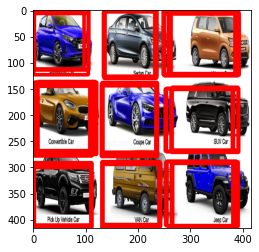

In [70]:
import matplotlib.pyplot as plt
plt.imshow(img)